In [78]:
import pandas as pd
import numpy as np
import os

from tqdm.notebook import tqdm

import seaborn as sns

import json

In [79]:
country_dict = {'ar':'Argentina', 'at':'Austria', 'au':'Australia', 'be':'Belgium',
       'bo':'Bolivia', 'br':'Brazil', 'ca':'Canada', 'ch':'Switzerland', 
       'cl':'Chile', 'co':'Columbia', 'cr':'CostaRica', 'cz':'CzechRepublic',
       'de':'Germany', 'dk':'Denmark', 'do':'DominicanRepublic', 'ec':'Ecuador', 
       'ee':'Estonia', 'es':'Spain', 'fi':'Finland', 'fr':'France', 
       'gb':'UnitedKingdom', 'global':'World', 'gr':'Greece', 'gt':'Guatemala',
       'hk':'HongKong', 'hn':'Honduras', 'hu':'Hungary', 'id':'Indonesia', 
       'ie':'Ireland', 'is':'Iceland', 'it':'Italy', 'jp':'Japan', 
       'lt':'Lithuania', 'lu':'Luxemborg', 'lv':'Latvia', 'mx':'Mexico', 
       'my':'Malaysia', 'nl':'Netherlands', 'no':'Norway', 'nz':'NewZealand', 
       'pa':'Panama', 'pe':'Peru', 'ph':'Philippines', 'pl':'Poland', 
       'pt':'Portugal', 'py':'Paraguay', 'se':'Sweden', 'sg':'Singapore', 
       'sk':'Slovakia', 'sv':'ElSalvador', 'tr':'Turkey', 'tw':'Taiwan', 'us':'USA', 'uy':'Uruguay',} 

In [80]:
ranking_df = pd.read_csv(os.path.join('data','data.csv'), parse_dates=['Date'])

In [81]:
def get_song_id(url):
    
    if type(url)== float:
        return "no id"
    else:
        return url.split('/')[-1]

In [82]:
ranking_df['song_id']= ranking_df['URL'].apply(get_song_id)

In [83]:
ranking_df['Region']= ranking_df['Region'].apply(lambda x: country_dict[x])

In [84]:
ranking_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,Ecuador,3AEZUABDXNtecAOSC1qTfo
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,Ecuador,6mICuAdrwEjh6Y6lroV2Kg
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,Ecuador,3QwBODjSEzelZyVjxPOHdq
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,Ecuador,7DM4BPaS7uofFul3ywMe46
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,Ecuador,6rQSrBHf7HlZjtcMZ4S4bO


Time period covered by the dataset

In [85]:
ranking_df['Date'].min(), ranking_df['Date'].max()

(Timestamp('2017-01-01 00:00:00'), Timestamp('2018-01-09 00:00:00'))

In [86]:
ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441197 entries, 0 to 3441196
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Position    int64         
 1   Track Name  object        
 2   Artist      object        
 3   Streams     int64         
 4   URL         object        
 5   Date        datetime64[ns]
 6   Region      object        
 7   song_id     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 210.0+ MB


Number of total entries in the dataset

In [87]:
ranking_df.shape

(3441197, 8)

Number of songs

In [88]:
ranking_df['song_id'].nunique()

21747

In [89]:
ranking_df = ranking_df[(ranking_df['song_id']!= 'no id') & (ranking_df['Region']!= 'global') ]

In [90]:
ranking_df.shape

(3441189, 8)

In [91]:
ranking_df['Region'].nunique()

54

In [92]:
s=ranking_df.groupby(['song_id','Region'])['Date'].min().to_frame()

In [93]:
s

Date
song_id                Region                  
000xQL6tZNLJzIrtIgxqSl Argentina     2017-04-08
                       Australia     2017-03-24
                       Austria       2017-03-24
                       Belgium       2017-03-24
                       Bolivia       2017-04-25
...                                         ...
7zxd3J5hMPeLN71VS8vnE4 UnitedKingdom 2017-12-02
7zyYmIdjqqiX6kLryb7QBx HongKong      2017-01-01
                       Malaysia      2017-01-03
                       Singapore     2017-01-01
                       Taiwan        2017-01-01

[74948 rows x 1 columns]

## Visualization of the dataset

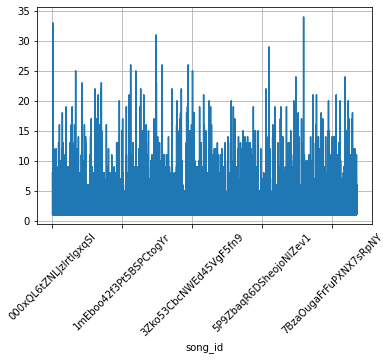

In [94]:
days_per_song= s.groupby(['song_id'])['Date'].nunique()
days_per_song.plot(grid=True, rot=45);

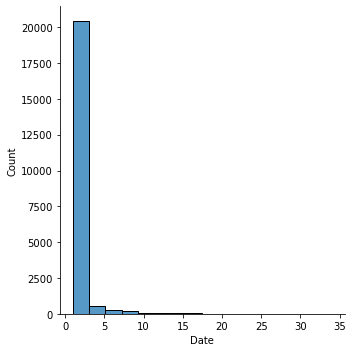

In [95]:
sns.displot(days_per_song);

## Remove songs appearing in duplicate countries initially

In [96]:
ranking_df['release_date']=ranking_df.groupby('song_id')['Date'].transform('min')

In [97]:
def remove_duplicate_songs_fn(ranking_df_):
    release_ranking_df = ranking_df_[ranking_df_['Date']== ranking_df['release_date']]
    num_initial_lists_df = release_ranking_df.groupby('song_id').size().to_frame()
    num_initial_lists_df.columns =['num_lists']
    songs_with_one_initial_list = num_initial_lists_df[num_initial_lists_df['num_lists']==1].index.to_list()
    return ranking_df_[ranking_df_['song_id'].isin(songs_with_one_initial_list)]   

In [98]:
clean_ranking_df = remove_duplicate_songs_fn(ranking_df)

In [99]:
clean_ranking_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date
45,46,Enamorándonos,Cabas,3734,https://open.spotify.com/track/0aywfeIr0tmhLZJ...,2017-01-01,Ecuador,0aywfeIr0tmhLZJxzqOhzP,2017-01-01
118,119,Para Enamorarte,CNCO,1791,https://open.spotify.com/track/3B21fRFqPLmTd9z...,2017-01-01,Ecuador,3B21fRFqPLmTd9zAlK0I8A,2017-01-01
129,130,Si No Te Quisiera,Juan Magán,1665,https://open.spotify.com/track/0wLqXnCLseMice1...,2017-01-01,Ecuador,0wLqXnCLseMice1Hwq6yLz,2017-01-01
146,147,Te Viví,Villamizar,1484,https://open.spotify.com/track/3SBjPXmpFIIKOvc...,2017-01-01,Ecuador,3SBjPXmpFIIKOvce7e6OXY,2017-01-01
167,168,Love Me,Juan Magán,1372,https://open.spotify.com/track/54MeG5FCVXStJTy...,2017-01-01,Ecuador,54MeG5FCVXStJTyNvRu9zN,2017-01-01


In [100]:
clean_ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896335 entries, 45 to 3441195
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Position      896335 non-null  int64         
 1   Track Name    896331 non-null  object        
 2   Artist        896331 non-null  object        
 3   Streams       896335 non-null  int64         
 4   URL           896335 non-null  object        
 5   Date          896335 non-null  datetime64[ns]
 6   Region        896335 non-null  object        
 7   song_id       896335 non-null  object        
 8   release_date  896335 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 68.4+ MB


## Song sequences generation

In [101]:
def generate_song_sequences_fn(song_ranking):
    dates=song_ranking.groupby('Region')['Date'].min().to_frame()
    dates_sort=dates.sort_values('Date')
    dates_sort= dates_sort.reset_index().set_index('Date')
    
    dates_lst=dates_sort.index.unique().values
    l=None
    if len(dates_lst)>= 2:
        l=dates_sort.loc[dates_lst[0]].values
        l=np.array(l).flatten()

        len_=1
        for d in range(1,len(dates_lst)):
            l2=dates_sort.loc[dates_lst[d]].values
            l2=np.array(l2).flatten()
            
            if len_ < 2:
                l=[[a,b] for a in l for b in l2]
            else:
                l=[a+[b] for a in l for b in l2]            
            len_+=1
    
            """
            if len_ < 2:
                l=[(a,)+(b,) for a in l for b in l2]
            else:
                l=[a+(b,) for a in l for b in l2]
            len_+=1
            """
    return l

In [102]:
def generate_song_direct_sequences_fn(song_ranking, influence_threshold = 3, min_threshold=1):
    
    dates=song_ranking.groupby('Region')['Date'].min().to_frame()
    dates_sort=dates.sort_values('Date')
    dates_sort= dates_sort.reset_index().set_index('Date')
    
    dates_lst=dates_sort.index.unique().values
    
    i_start = 0
    list_ = []
    if len(dates_lst)>= 2:
        for i_start in range(0,len(dates_lst)):
            do =dates_lst[i_start]
            lo=dates_sort.loc[do].values
            lo=np.array(lo).flatten()

            for i_end in range(i_start+1,len(dates_lst)):
                de =dates_lst[i_end]
                dif = int((de-do)/86400000000000)

                if (dif <= influence_threshold) and (dif> min_threshold):
                    if dif>0:
                        #print("comparamos", dif, dates_lst[i_start], dates_lst[i_end])

                        le=dates_sort.loc[de].values
                        le=np.array(le).flatten()

                        l =[[a,b] for a in lo for b in le]
                        #print(l)
                        list_ = list_+l
    return list_

In [103]:
seq={}
influence_threshold = 3 #days
min_threshold=1 #days
for s in tqdm(clean_ranking_df['song_id'].unique()):
    song_ranking= clean_ranking_df[clean_ranking_df['song_id']==s]
    #song_seq= generate_song_sequences_fn(song_ranking)
    song_seq = generate_song_direct_sequences_fn(song_ranking, influence_threshold, min_threshold)
    if (song_seq is not None) and len(song_seq)>1:
        #print(s,song_seq)
        seq[s]=song_seq

with open(os.path.join('data',f'clean_song_sequence_direct_{min_threshold}_{influence_threshold}.json'), 'w') as json_file:
    json.dump(seq, json_file)

Generate ranking with consequtive secuences

In [104]:
seq={}
influence_threshold = 5 #days
min_threshold=0 #days
max_pos=4
ranking_lite_df = clean_ranking_df[clean_ranking_df['Position']<=max_pos]
for s in tqdm(ranking_lite_df['song_id'].unique()):
    song_ranking= ranking_lite_df[ranking_lite_df['song_id']==s]
    song_seq = generate_song_direct_sequences_fn(song_ranking, influence_threshold, min_threshold)
    if (song_seq is not None) and len(song_seq)>1:
        seq[s]=song_seq
        
with open(os.path.join('data',f'clean_song_sequence_direct_{min_threshold}_{influence_threshold}_{max_pos}.json'), 'w') as json_file:
    json.dump(seq, json_file)    

In [105]:
 print("That's all folks")

That's all folks


----------------------------------------------------------------------------

Test code

In [22]:
ranking_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,Ecuador,3AEZUABDXNtecAOSC1qTfo
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,Ecuador,6mICuAdrwEjh6Y6lroV2Kg
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,Ecuador,3QwBODjSEzelZyVjxPOHdq
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,Ecuador,7DM4BPaS7uofFul3ywMe46
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,Ecuador,6rQSrBHf7HlZjtcMZ4S4bO


In [23]:
ranking_df.tail()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,HongKong,71bBFbfn2OBK5QwUJSLS44
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,HongKong,7vu0JkJh0ldukEYbTVcqd0
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,HongKong,0pmGleExiQyd0HxV5kAOwK
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,HongKong,58SUsgamkW6vFFq0YNKGrf
3441196,200,Let Her Go,Passenger,2088,https://open.spotify.com/track/2jyjhRf6DVbMPU5...,2018-01-09,HongKong,2jyjhRf6DVbMPU5zxagN2h


In [24]:
ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3441189 entries, 0 to 3441196
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Position    int64         
 1   Track Name  object        
 2   Artist      object        
 3   Streams     int64         
 4   URL         object        
 5   Date        datetime64[ns]
 6   Region      object        
 7   song_id     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 236.3+ MB


In [25]:
ranking_df['release_date']=ranking_df.groupby('song_id')['Date'].transform('min')

In [26]:
release_ranking_df = ranking_df[ranking_df['Date']== ranking_df['release_date']]

In [27]:
release_ranking_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,Ecuador,3AEZUABDXNtecAOSC1qTfo,2017-01-01
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,Ecuador,6mICuAdrwEjh6Y6lroV2Kg,2017-01-01
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,Ecuador,3QwBODjSEzelZyVjxPOHdq,2017-01-01
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,Ecuador,7DM4BPaS7uofFul3ywMe46,2017-01-01
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,Ecuador,6rQSrBHf7HlZjtcMZ4S4bO,2017-01-01


In [28]:
release_ranking_df[release_ranking_df['release_date']=='20017']

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date


In [29]:
release_ranking_df[release_ranking_df['song_id']=='007QSAaELpVxtX5Z6dMn0U']

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date
1227113,200,Laranjinha - Ao Vivo,Wesley Safadão,37782,https://open.spotify.com/track/007QSAaELpVxtX5...,2017-08-27,Brazil,007QSAaELpVxtX5Z6dMn0U,2017-08-27


In [43]:
num_initial_lists_df = release_ranking_df.groupby('song_id').size().to_frame()
num_initial_lists_df.columns =['num_lists']
num_initial_lists_df.head()

,num_lists
song_id,
000xQL6tZNLJzIrtIgxqSl,39
000xYdQfIZ4pDmBGzQalKU,1
004q4eDxR33ci4f8m4flwl,1
006pMMCuRo2TFjh8sNGSov,1
007QSAaELpVxtX5Z6dMn0U,1


In [47]:
num_initial_lists_df[num_initial_lists_df['num_lists']>1]

,num_lists
song_id,
000xQL6tZNLJzIrtIgxqSl,39
00DcwM45CMDjGChnoFRQ6y,2
00Ro1lnV3V6i87aY4t8Q43,2
00cGr3oLNjjESBJ3OQyyCE,2
00cbRAOr6wTPE9WBMejhiM,3
...,...
7zLGHiDWd9T1Rxw4PQCb13,40
7zTx8ePYAmPFQuxP3xlXZn,15
7zgqtptZvhf8GEmdsM2vp2,50


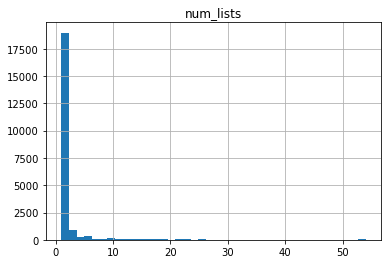

In [52]:
num_initial_lists_df.hist(bins=40);

In [56]:
songs_with_one_initial_list = num_initial_lists_df[num_initial_lists_df['num_lists']==1].index.to_list()
len(songs_with_one_initial_list)

17089

In [57]:
ranking_df[ranking_df['song_id'].isin(songs_with_one_initial_list)]

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id,release_date
45,46,Enamorándonos,Cabas,3734,https://open.spotify.com/track/0aywfeIr0tmhLZJ...,2017-01-01,Ecuador,0aywfeIr0tmhLZJxzqOhzP,2017-01-01
118,119,Para Enamorarte,CNCO,1791,https://open.spotify.com/track/3B21fRFqPLmTd9z...,2017-01-01,Ecuador,3B21fRFqPLmTd9zAlK0I8A,2017-01-01
129,130,Si No Te Quisiera,Juan Magán,1665,https://open.spotify.com/track/0wLqXnCLseMice1...,2017-01-01,Ecuador,0wLqXnCLseMice1Hwq6yLz,2017-01-01
146,147,Te Viví,Villamizar,1484,https://open.spotify.com/track/3SBjPXmpFIIKOvc...,2017-01-01,Ecuador,3SBjPXmpFIIKOvce7e6OXY,2017-01-01
167,168,Love Me,Juan Magán,1372,https://open.spotify.com/track/54MeG5FCVXStJTy...,2017-01-01,Ecuador,54MeG5FCVXStJTyNvRu9zN,2017-01-01
...,...,...,...,...,...,...,...,...,...
3441186,190,那一年零一個月,Feanna Wong,2165,https://open.spotify.com/track/6vZxE6aYqsq73SY...,2018-01-09,HongKong,6vZxE6aYqsq73SYiNAcHAt,2017-12-08
3441187,191,"我多喜歡你,你會知道 - 網劇《致我們單純的小美好》推廣曲",王俊琪,2148,https://open.spotify.com/track/221FBKC22DTc7Xk...,2018-01-09,HongKong,221FBKC22DTc7XkPIaZYOl,2017-11-23
3441188,192,富士山下,Eason Chan,2144,https://open.spotify.com/track/3cthRwQ2X0SNTaa...,2018-01-09,HongKong,3cthRwQ2X0SNTaauD7tjn5,2017-08-04
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,HongKong,0pmGleExiQyd0HxV5kAOwK,2017-11-11


In [31]:
release_ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51811 entries, 0 to 3441158
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Position      51811 non-null  int64         
 1   Track Name    51533 non-null  object        
 2   Artist        51533 non-null  object        
 3   Streams       51811 non-null  int64         
 4   URL           51811 non-null  object        
 5   Date          51811 non-null  datetime64[ns]
 6   Region        51811 non-null  object        
 7   song_id       51811 non-null  object        
 8   release_date  51811 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 4.0+ MB


In [32]:
song_ranking= ranking_df[ranking_df['song_id']=='3AEZUABDXNtecAOSC1qTfo']

In [33]:
dates=song_ranking.groupby('Region')['Date'].min().to_frame()

In [34]:
dates_sort=dates.sort_values('Date')

In [35]:
dates_sort= dates_sort.reset_index().set_index('Date')

In [36]:
dates_sort.head()

,Region
Date,
2017-01-01,Argentina
2017-01-01,Switzerland
2017-01-01,Spain
2017-01-01,Portugal
2017-01-01,Peru


In [37]:
dates_lst=dates_sort.index.unique().values
dates_lst

array(['2017-01-01T00:00:00.000000000', '2017-01-02T00:00:00.000000000',
       '2017-01-06T00:00:00.000000000', '2017-01-18T00:00:00.000000000',
       '2017-01-22T00:00:00.000000000', '2017-01-23T00:00:00.000000000',
       '2017-01-24T00:00:00.000000000', '2017-01-27T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [38]:
dates_lst

array(['2017-01-01T00:00:00.000000000', '2017-01-02T00:00:00.000000000',
       '2017-01-06T00:00:00.000000000', '2017-01-18T00:00:00.000000000',
       '2017-01-22T00:00:00.000000000', '2017-01-23T00:00:00.000000000',
       '2017-01-24T00:00:00.000000000', '2017-01-27T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [39]:
influence_threshold = 3
i_start = 0
list_ = []
if len(dates_lst)>= 2:
    for i_start in range(0,len(dates_lst)):
        do =dates_lst[i_start]
        lo=dates_sort.loc[do].values
        lo=np.array(lo).flatten()
        
        for i_end in range(i_start+1,len(dates_lst)):
            de =dates_lst[i_end]
            dif = int((de-do)/86400000000000)

            if dif <= influence_threshold:
                if dif>0:
                    #print("comparamos", dif, dates_lst[i_start], dates_lst[i_end])

                    le=dates_sort.loc[de].values
                    le=np.array(le).flatten()
                    
                    l =[[a,b] for a in lo for b in le]
                    #print(l)
                    list_ = list_+l
list_

[['Argentina', 'Poland'],
 ['Switzerland', 'Poland'],
 ['Spain', 'Poland'],
 ['Portugal', 'Poland'],
 ['Peru', 'Poland'],
 ['Paraguay', 'Poland'],
 ['Panama', 'Poland'],
 ['Mexico', 'Poland'],
 ['Japan', 'Poland'],
 ['Italy', 'Poland'],
 ['Uruguay', 'Poland'],
 ['Honduras', 'Poland'],
 ['World', 'Poland'],
 ['ElSalvador', 'Poland'],
 ['Ecuador', 'Poland'],
 ['DominicanRepublic', 'Poland'],
 ['CostaRica', 'Poland'],
 ['Columbia', 'Poland'],
 ['Chile', 'Poland'],
 ['Bolivia', 'Poland'],
 ['Guatemala', 'Poland'],
 ['Belgium', 'Austria'],
 ['Belgium', 'Netherlands'],
 ['Austria', 'Netherlands'],
 ['Netherlands', 'Singapore']]

In [40]:
influence_threshold = 2
i_start = 0
list_ = []
if len(dates_lst)>= 2:
    #do =dates_lst[i_start]
    l=dates_sort.loc[d_o].values
    l=np.array(l).flatten()
    
    i_end = i_start+1
    while i_end < len(dates_lst):
        do =dates_lst[i_start]
        de =dates_lst[i_end]
        dif = int((de-do)/86400000000000)
        if dif <= influence_threshold:
            if dif>0:
                print("comparamos", dif, dates_lst[i_start], dates_lst[i_end])
                lo=dates_sort.loc[do].values
                lo=np.array(lo).flatten()
                
                le=dates_sort.loc[de].values
                le=np.array(le).flatten()
                
                l =[[a,b] for a in lo for b in le]
                #print(l)
                list_.append(l)
                #print(list_)
                    
            i_end += 1
        else:
            print("fallo", dif, dates_lst[i_start], dates_lst[i_end])

            i_start +=1
            print("avanzamos", dif, dates_lst[i_start], dates_lst[i_end])
list_

NameError: name 'd_o' is not defined

In [ ]:
if len(dates_lst)>= 2:
    l=dates_sort.loc[dates_lst[0]].values
    l=np.array(l).flatten()

    len_=1
    for d in tqdm(range(1,len(dates_lst))):
        l2=dates_sort.loc[dates_lst[d]].values
        l2=np.array(l2).flatten()
        
        if len_ < 2:
            l=[[a,b] for a in l for b in l2]
        else:
            l=[a+[b] for a in l for b in l2]
        len_+=1
        
l    

In [ ]:
l1=dates_sort.loc['2017-02-16'].values
l1=np.array(l1).flatten()
l1

In [ ]:
l2=dates_sort.loc['2017-02-17'].values
l2=np.array(l2).flatten()
l2

In [ ]:
l3=[(a,)+(b,) for a in l1 for b in l2]

In [ ]:
l3

In [ ]:
l4=dates_sort.loc['2017-02-18'].values
l4=np.array(l4).flatten()
l4

In [ ]:
l5=[a+(b,) for a in l3 for b in l4]

In [ ]:
l5

In [ ]:
len(dates)

In [ ]:
dates.iloc[0]

In [ ]:
for i in range(len(dates)):
    c2,d1 = dates.iloc[i]
    for j in range(i,len(dates)):
        c2,d2= dates.iloc[]

In [ ]:
song_ranking

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
white_list= []
for song in tqdm(ranking_df['song_id'].unique()):
    song_ranking= ranking_df[ranking_df['song_id']==song]
    num_dates = song_ranking.groupby('Region')['Date'].min().nunique()
    if num_dates >= 3:
        white_list.append(song)
    #print(song,song_ranking.groupby('Region')['Date'].min().nunique())

In [ ]:
clean_ranking_df = ranking_df[ranking_df['song_id'].isin(white_list)]

In [ ]:
clean_ranking_df.shape

In [ ]:
clean_ranking_df.head()